In [61]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%config InlineBackend.figure_format='retina'

Estimated coefficients:
b_0 = 4.919899538199793            
b_1 = 0.6963671716762535


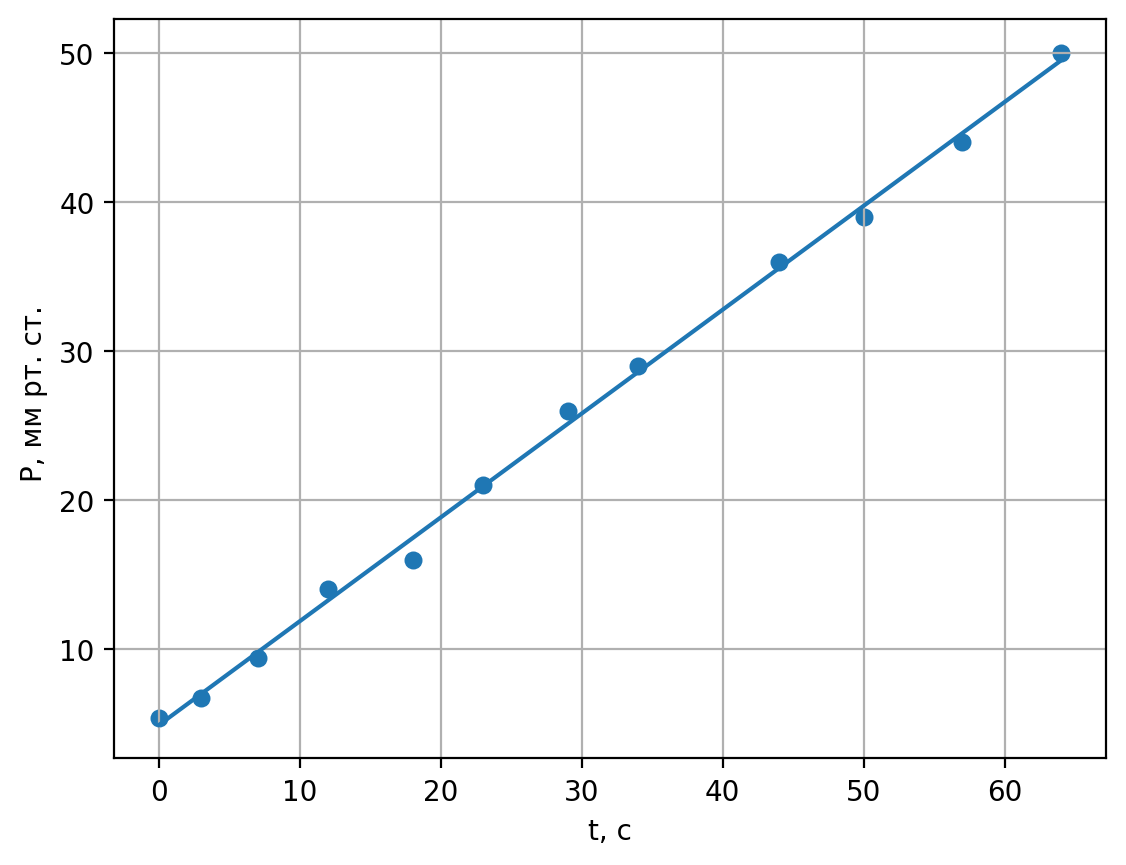

In [62]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0, b_1)


def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, marker="o", s=30)

    # plt.errorbar(x, y, xerr=0, yerr=0.03, marker='o', linestyle='None',
    #              ecolor='k', elinewidth=0.8, capsize=2, capthick=1)

    # predicted response vector
    y_pred = b[0] + b[1] * x

    # plotting the regression line
    plt.plot(x, y_pred)

    # putting labels
    # plt.title('ln($P$)')
    plt.xlabel('t, c')
    plt.ylabel('P, мм рт. ст. ')

    plt.grid()

    # function to show plot
    plt.show()


def main():
    # observations / data

    my_data = genfromtxt('data.csv', delimiter=',')

    first, second = [], []
    for element in my_data:
        first.append(element[0])
        second.append(element[1])

    del first[0]
    del second[0]

    x = np.array(first)
    y = np.array(second)

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)


if __name__ == "__main__":
    main()
